In [1]:
import os
import sys; sys.path.insert(0, os.path.abspath("../../"))
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from dataset.dataset import SkinLesion_Dataset, SegExamples
from pipeline.preprocessing import SkinLesionPreprocessing
from pipeline.feature_extraction import FeaturesExtraction
from pathlib import Path
import time

In [2]:
data = SkinLesion_Dataset(class_task='binary',resize_image= True)
preproc = SkinLesionPreprocessing()

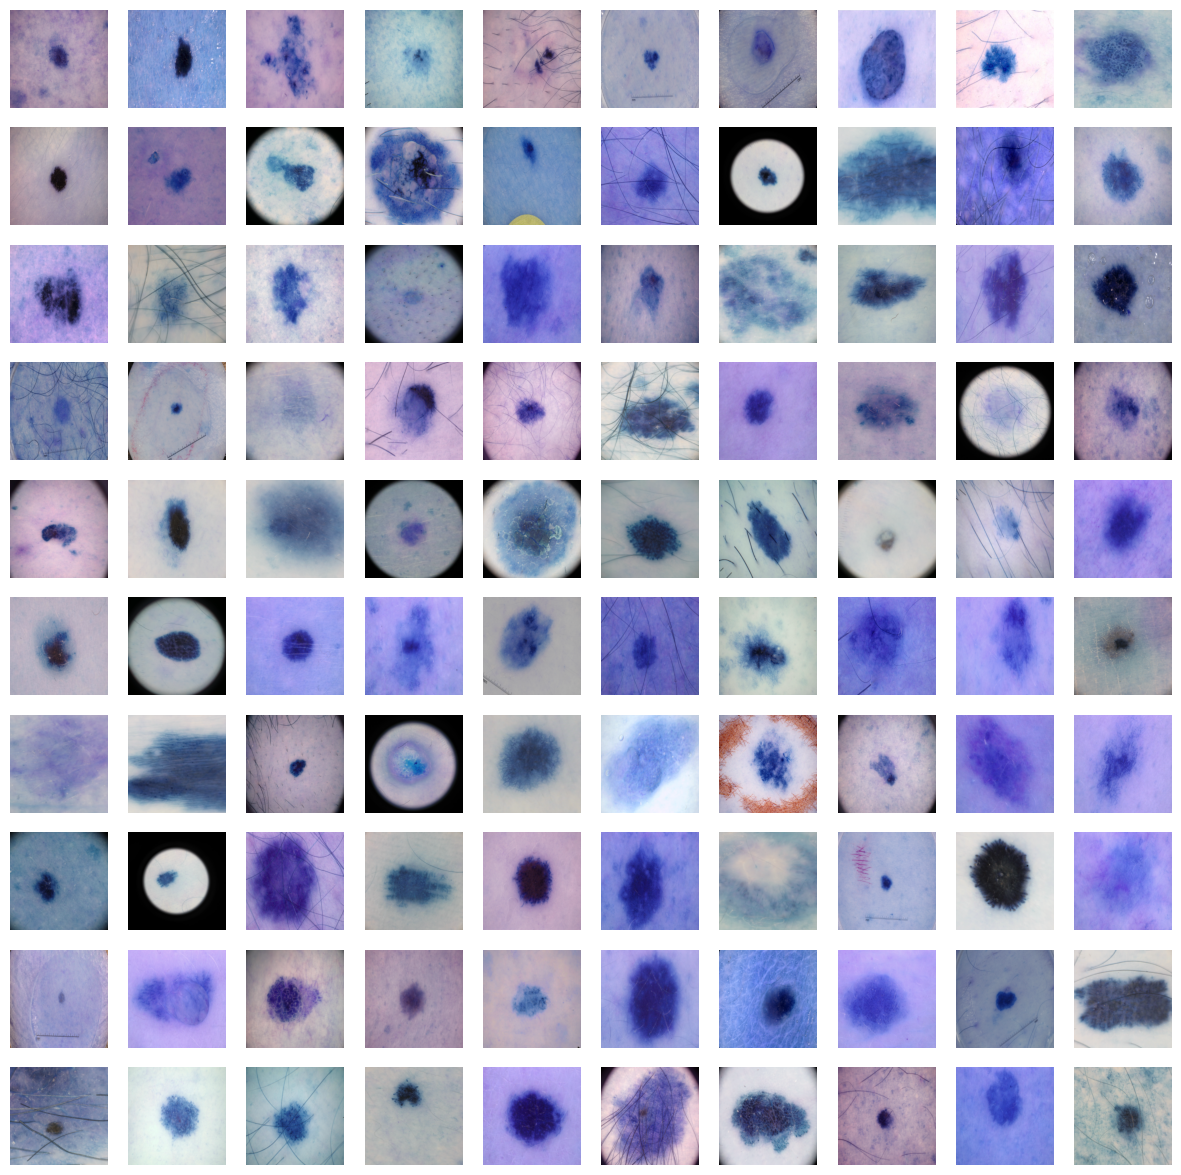

In [5]:
f, axs = plt.subplots(10, 10, figsize=(15, 15))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(data[i]['img'])
    ax.axis('off')

In [3]:
data2 = SkinLesion_Dataset(class_task='binary',resize_image= False)
preproc2 = SkinLesionPreprocessing(resize=True, remove_hair=False)

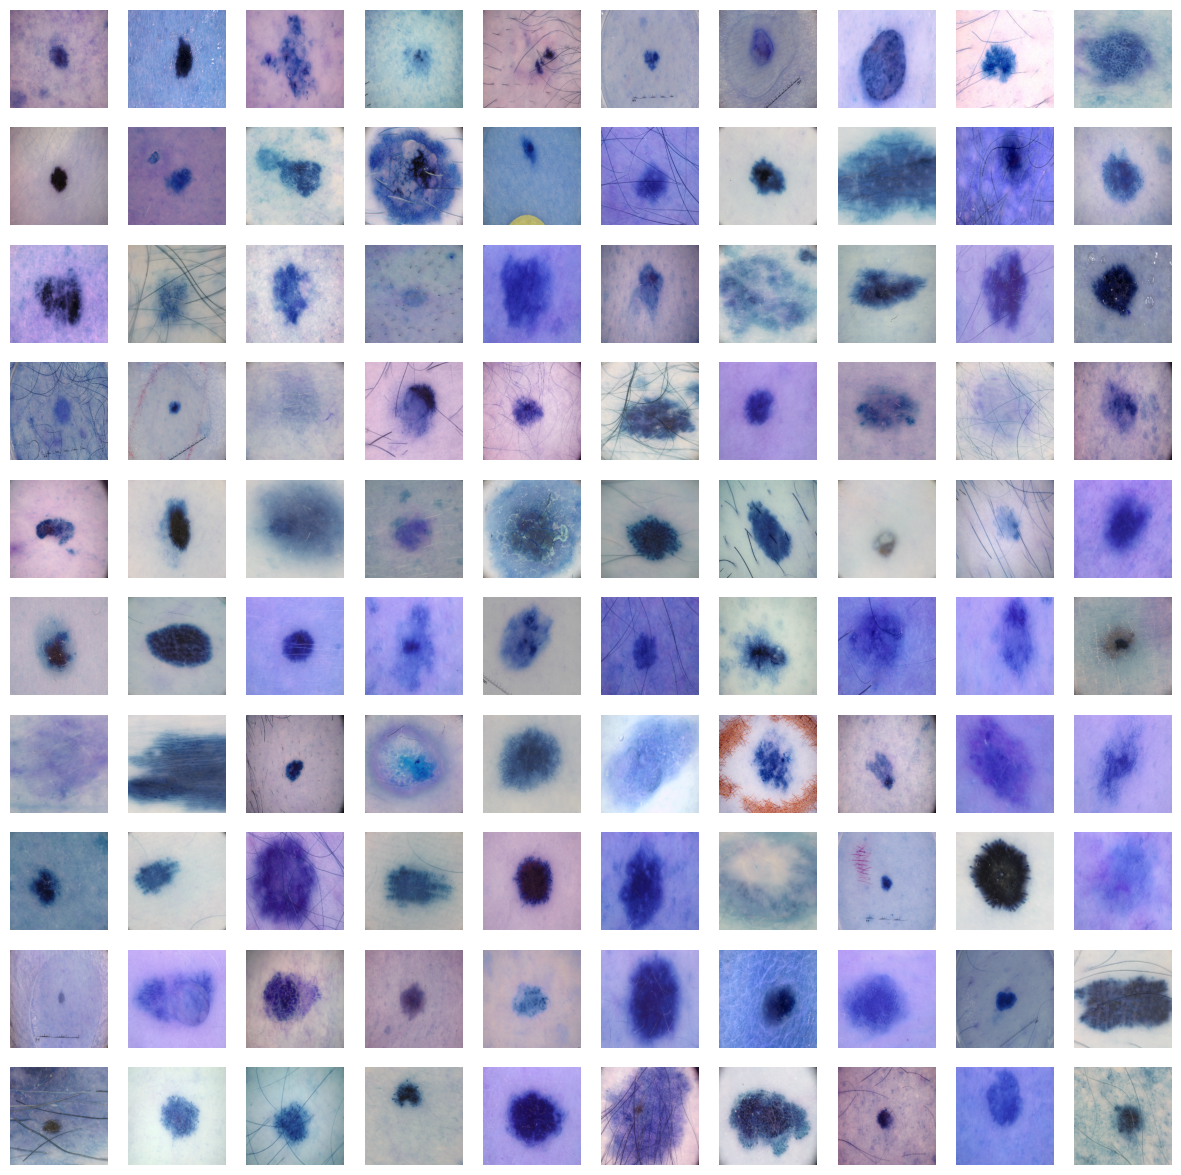

In [5]:
f, axs = plt.subplots(10, 10, figsize=(15, 15))
for i, ax in enumerate(axs.flatten()):
    image = data2[i]['img']
    image = preproc2.preprocess(image, resize_shape=(224, 224))
    ax.imshow(image)
    ax.axis('off')

In [6]:
data2.datapath_class/Path(data2.md_df['path'].iloc[0])

PosixPath('/home/alex/Documents/MAIA/udG/CAD/Skin_lesion_segmentation/data/binary/../data/binary/val/nevus/nev08391.jpg')

In [5]:
data2[0]

/val/nevus/nev08391.jpg


[ WARN:0@6.925] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/val/nevus/nev08391.jpg'): can't open/read file: check file path/integrity


{'idx': 0, 'label': 'nevus', 'img_id': 8391, 'img': None}

In [10]:
data2.md_df['path'].iloc[0].split('binary')[-1]

'/val/nevus/nev08391.jpg'

In [9]:
data2.md_df.iloc[0]

img_id                                       8391
label                                       nevus
sublabel                                      nev
size                                (450, 600, 3)
height                                        450
width                                         600
path        ../data/binary/val/nevus/nev08391.jpg
split                                         val
Name: 0, dtype: object

In [4]:
data2[0]

[ WARN:0@21.498] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../data/binary/val/nevus/nev08391.jpg'): can't open/read file: check file path/integrity


{'idx': 0, 'label': 'nevus', 'img_id': 8391, 'img': None}

In [ ]:
# rewrite the dataset to disk
for i in tqdm(range(len(data2.md_df))):
    image = data2[i]['img']
    image = preproc2.preprocess(image, resize_shape=(224, 224))
    cv2.imwrite(f'../../data/processed/resize_images/{data2.md_df.iloc[i]["image_id"]}.jpg', image)